<a href="https://colab.research.google.com/github/smayan-kumar-panda/capGcodes/blob/main/SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC,SVR
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,f1_score,recall_score
import seaborn as sns

In [3]:
df=pd.read_csv('bankloan.csv')
df

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [6]:
df=df.drop(['ID','ZIP.Code'],axis=1)
df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal.Loan,Securities.Account,CD.Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


In [7]:
x=df.drop('Personal.Loan',axis=1)
y=df['Personal.Loan']


In [8]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)

In [12]:
model=SVC(kernel='linear')
model.fit(xtrain,ytrain)

SVC(kernel='linear')

In [13]:
ypred=model.predict(xtest)
ypred

array([0, 0, 0, ..., 0, 0, 1])

In [14]:
train_eff=model.score(xtrain,ytrain)
test_eff=model.score(xtest,ytest)
print('train_eff- ',train_eff)
print('test_eff - ',test_eff)

train_eff-  0.954
test_eff -  0.9473333333333334


In [17]:
cmat=confusion_matrix(ytest,ypred)
cmat

array([[1334,    9],
       [  70,   87]])

In [18]:
pre=precision_score(ytest,ypred)
rec=recall_score(ytest,ypred)
f1=f1_score(ytest,ypred)
print('precision - ',pre)
print('recall - ',rec)
print('f1 - ',f1)

precision -  0.90625
recall -  0.554140127388535
f1 -  0.6877470355731226


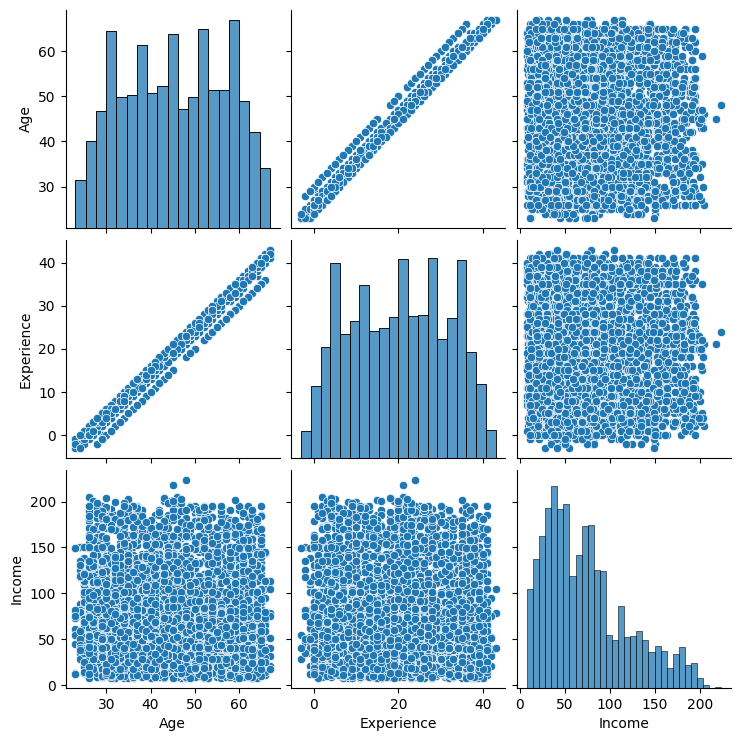

In [16]:
data=df.loc[:,['Age','Experience','Income']]
sns.pairplot(data)